In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sns.set_style('darkgrid')

In [4]:
main_df = pd.read_csv("bike_hours.csv")
main_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
main_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10363,10364,2012-03-12,1,1,3,22,0,1,1,2,0.56,0.5303,0.56,0.2239,17,116,133
8660,8661,2012-01-01,1,1,1,15,0,0,0,1,0.46,0.4545,0.51,0.2985,101,164,265
8150,8151,2011-12-11,4,0,12,6,0,0,0,1,0.16,0.2273,0.59,0.0000,0,10,10
7409,7410,2011-11-10,4,0,11,8,0,4,1,2,0.40,0.4091,0.94,0.0896,18,418,436
10967,10968,2012-04-07,2,1,4,3,0,6,0,1,0.36,0.3333,0.32,0.2537,7,21,28
4344,4345,2011-07-04,3,0,7,22,1,1,0,2,0.74,0.6818,0.62,0.1343,115,211,326
1830,1831,2011-03-22,2,0,3,0,0,2,1,1,0.46,0.4545,0.88,0.1940,4,7,11
1920,1921,2011-03-25,2,0,3,19,0,5,1,2,0.30,0.2879,0.36,0.2836,9,126,135
10854,10855,2012-04-02,2,1,4,10,0,1,1,1,0.40,0.4091,0.50,0.5224,85,119,204
3440,3441,2011-05-28,2,0,5,6,0,6,0,1,0.58,0.5455,0.83,0.2537,3,16,19


In [6]:
main_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [7]:
main_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
print("Using Column Data Type::\n" )
print(main_df.select_dtypes(include=['float64']).columns)

Using Column Data Type::

Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')


In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
main_df.shape

(17379, 17)

In [11]:
main_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
main_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Data Cleaning

#### Standardize Attribute Names

In [13]:
main_df.rename(columns={'instant':'rec_id',
'dteday':'datetime',
'holiday':'is_holiday',
'workingday':'is_workingday',
'weathersit':'weather_condition',
'hum':'humidity',
'mnth':'month',
'cnt':'total_count',
'hr':'hour',
'yr':'year'},inplace=True)

In [14]:
main_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [15]:
#import pandas_profiling 
#pandas_profiling.ProfileReport(main_df)

###  1. Checking for Completeness

In [16]:
print("Columns with Missing Values::",main_df.columns[main_df.isnull().any()].tolist())

Columns with Missing Values:: []


In [17]:
main_df.isna().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [18]:
# The dataset is complete as it contains no missing values

### 2. Checking for consistency

In [19]:
main_df.duplicated().sum()

0

In [20]:
# The dataset is consistent as it contains no duplicated values

### 3. Checking for Uniformity

In [21]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

#### Typecast Attributes

In [22]:
# Date time conversion to timestamp
main_df['datetime'] = pd.to_datetime(main_df.datetime)

# Converting the variables to categorical
main_df['season'] = main_df.season.astype('category')
main_df['is_holiday'] = main_df.is_holiday.astype('category')
main_df['weekday'] = main_df.weekday.astype('category')
main_df['weather_condition'] = main_df.weather_condition.astype('category')
main_df['is_workingday'] = main_df.is_workingday.astype('category')
main_df['month'] = main_df.month.astype('category')
main_df['year'] = main_df.year.astype('category')
main_df['hour'] = main_df.hour.astype('category')

In [23]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [24]:
# Taking care of the category columns which were classified as of integer data type 

### 4. Checking for Validity

<AxesSubplot:>

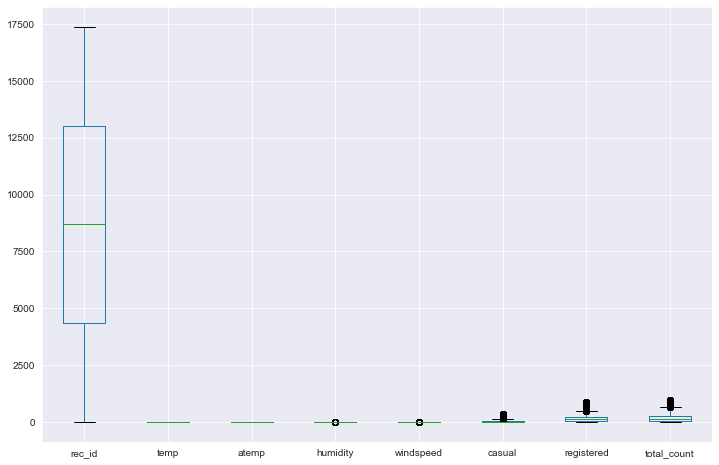

In [25]:
main_df.boxplot(figsize=(12,8))

In [26]:
# creating a function to check and handle outliers
def check_and_handle_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [27]:
main_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [28]:
main_df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [30]:
# hanling outliers for the numerical columns
for col in ['rec_id','temp','atemp','humidity','windspeed','casual','registered','total_count']:
    check_and_handle_outliers(main_df, col)

<AxesSubplot:xlabel='year', ylabel='total_count'>

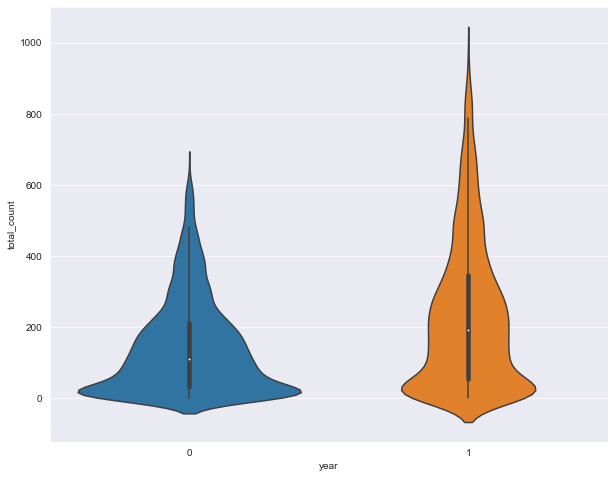

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data=main_df[['year','total_count']],x="year",y="total_count",ax=ax)

In [ ]:
# interpretation of the violin  plot 
# it is more advantageaous to the boxplot due to the ability to visualize probabilty density of data especially for multimodal data
## 

<AxesSubplot:>

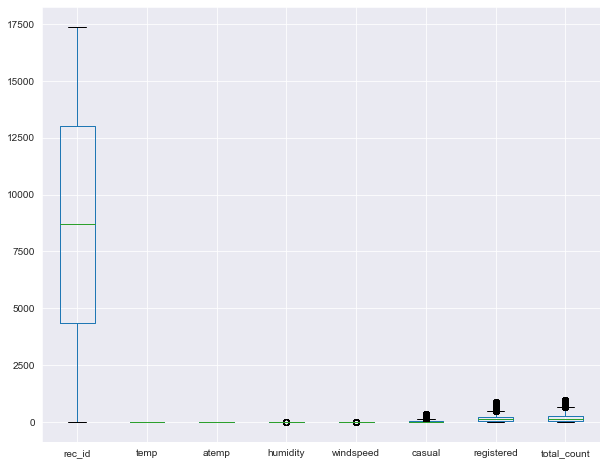

In [52]:
main_df.boxplot(figsize=(10,8))

In [ ]:
# find out how to really tell if there are outliers or not in the dataset

In [ ]:
# use the Z score method of dealing with outliers 

## Data Preparation

### Dealing with categorical columns

In [ ]:
visual_df = main_df.copy()

In [ ]:
visual_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_counnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# visual_df name the categorical columns for easier interpretation while visualization

In [ ]:
# try out the get_dummy method to encode the columns

## Explanatory Data Analysis

###  1. Univariate Analysis

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

[Text(0.5, 1.0, 'Season Wise hourly distribution of counts')]

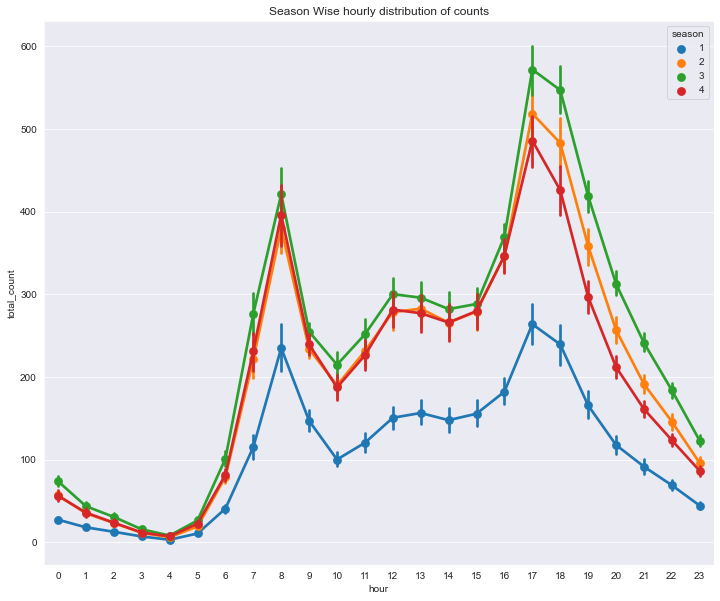

In [38]:
fig , ax = plt.subplots(figsize=(12,10))
sns.pointplot(data=main_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title='Season Wise hourly distribution of counts')

[Text(0.5, 1.0, 'Monthly distribution of counts')]

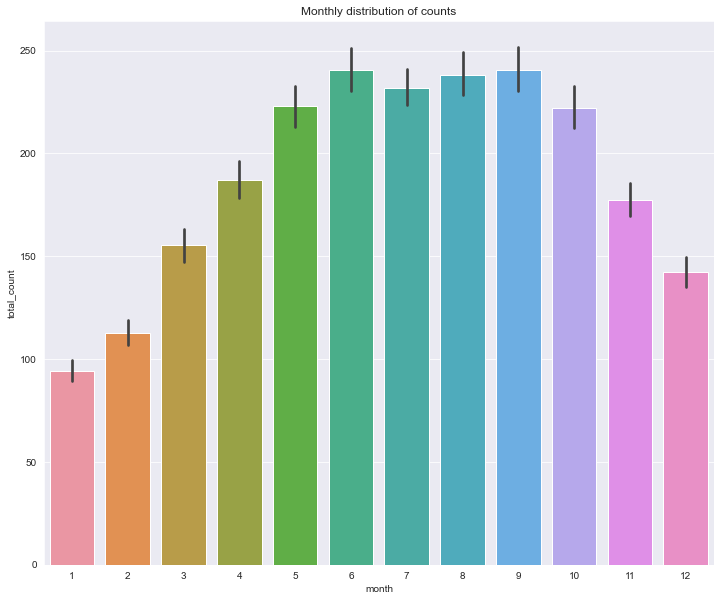

In [37]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=main_df[['month','total_count']], x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

In [42]:
main_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'temp'),
  Text(0, 1.5, 'atemp'),
  Text(0, 2.5, 'windspeed'),
  Text(0, 3.5, 'humidity'),
  Text(0, 4.5, 'casual'),
  Text(0, 5.5, 'registered'),
  Text(0, 6.5, 'total_count')])

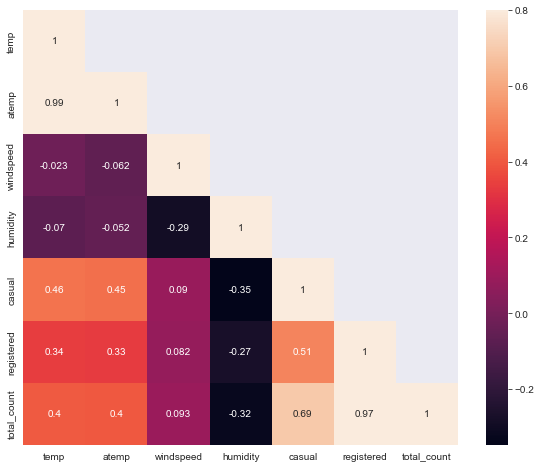

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
corrMatt = main_df[["temp","atemp","windspeed","humidity","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True,annot=True,ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
def fit_transform(df,col_name):
   # label encode the column
   le = preprocessing.LabelEncoder()
   le_labels = le.fit_transform(df[col_name])
   df[col_name+'_label'] = le_labels

   # one hot encoding
   ohe = preprocessing.OneHotEncoder()
   feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
   feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
   features_df = pd.DataFrame(feature_arr, columns=feature_labels)
   return le,ohe,features_df

In [ ]:
X , X_test, y, y_test = train_test_split(main_df.iloc[:,0:-3],main_df.iloc[:,-1],test_size=0.33, random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [ ]:
cat_attr_list = ['season','is_holiday','weather_condition','is_workingday','hour','weekday','month','year']
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],'ohe_enc':return_obj[1],'feature_df':return_obj[2],'col_name':col})

In [ ]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df']])
for enc in encoded_attr_list
if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

In [ ]:
X = train_df_new
y = y.total_counts.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

In [ ]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

In [ ]:
fig ,ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2, color='black')
ax.set_xlabel('observed')
ax.set_ylabel('residual')
plt.show()

### Testing

In [ ]:
test_encoded_attr_list = []
for enc in test_encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']

    test_encoded_attr_list.append({'feature_df':transfer_ohe(X_test,le,ohe,col_name),'col_name':col_name})

    test_feature_df_list = [X_test[numeric_feature_cols]]
   
    test_feature_df_list.extend([enc['feature_df']
    
    for enc in test_encoded_attr_list :

        if enc['col_name'] in subset_cat_features]):
            test_df_new = pd.concat(test_feature_df_list, axis=1)
            print("Shape::{}".format(test_df_new.shape))

In [ ]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred 

In [ ]:
# importing r2_score or coefficient of determination

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()


In [ ]:
# implementing decision trees

dtr = DecisionTreeRegressor(max_depth=4,min_sample_split=5,
max_leaf_node=10)

In [ ]:
# visualizing the decision tree

dot_data = tree.export_graphviz(dtr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("bikeshare.pdf")

In [ ]:
# feature selection using Gridsearch

param_grid = {"criterion": ["mse","mae"],
                    "min_samples_split": [10,20, 40],
                    "max_depth": [2, 6, 8],
                    "min_samples_leaf": [20,40, 100],
                    "max_leaf_nodes": [5, 20, 100, 500, 800],
            }

grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [ ]:
# getting the highest score and best parameter combination

print("R-squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

In [ ]:

fig,ax = plt.subplots()
sns.pointplot(data=main_df[['mean_test_score','param_max_leaf_nodes','param_max_depth']],y='mean_test_score',x='param_max_depth',ax=ax,hue='param_max_leaf_nodes')
ax.set(title="Affect of Depth and Leaf Nodes on Model Performance")

In [ ]:

y_pred = best_dtr_model.predict(X_test)
residuals = y_test.faltten() - y_pred

In [ ]:
# Evaluation
print("R-squared::{}".format(r2_score))